# サポートベクターマシン(SVM: Support Vector Machine)

2012年頃のディープラーニングが活用されるまで、広く利用されていた強力なアルゴリズムの１つ。
パーセプトロンの拡張とみなすことができ、
パーセプトロンアルゴリズムは、誤分類率を最小化した。
これに対し、SVMはマージンを最大化するようにする。

マージンは、超平面（決定境界）と、この超平面に最も近いトレーニングサンプルとの間の距離と定義されます。
サポートベクトルは、超平面に最も近いトレーニングサンプルのことをいいます。

決定境界のマージンを大きくすると、汎化誤差が小さくなる傾向にある。
逆に、マージンの小さいモデルは過学習になりやすい。

## 超平面の数式

決定境界に沿った正(positive)と負(negative)の超平面は次のように表せれる。

$$
w_0 + W^T X_{pos} = 1
$$

$$
w_0 + W^T X_{neg} = -1
$$

2つの線形方程式を引き算する

$$
W^T (X_{pos} - X_{neg} ) = 2
$$

ベクトルの長さを次のように定義する

$$
||w|| = \sqrt{ \sum_{j=1}^m w_j^2 }
$$

これを線形方程式に適用させる

$$
\frac{ W^T (X_{pos} - X_{neg}) }{||W||} = \frac{2} {||w||}
$$

この式の左辺は、正の超平面と負の超平面の距離（最大化したいマージン）と解釈できる。

SVMの目的関数を最大化する問題は、 $ \frac{2}{||w||} $ の最大化 問題に帰着される

実際には、逆数をとって2乗した $\frac{1}{2} ||w||^2 $ を最小化するほうが簡単になので、こちらを二次計画法により計算する。

SVMの詳細は、「The Nature of Statistical Learning Theory」が参考になる

## SVMの実装 (scikit-learn)

In [1]:
# Irisデータの読み込み
from sklearn import datasets
import numpy as np

# Irisデータセットをロード。人気なデータセットなので、scikit-learnに既に入っている
iris = datasets.load_iris()
# 3, 4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# 正解ラベルを取得
y = iris.target

# データセットの分割
from sklearn.cross_validation import train_test_split
# トレーニングデータとテストデータに分割
# 70%をトレーニングセット、30%をテストセットとしてランダムに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 特徴量のスケーリング
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 計算した平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
# 決定境界をプロットするメソッドの定義
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 2次元のデータセットの決定境界(Decision Regions)をプロットする
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))

    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 元のグリッドポイントのデータサイズに戻す
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    # テストセットを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')

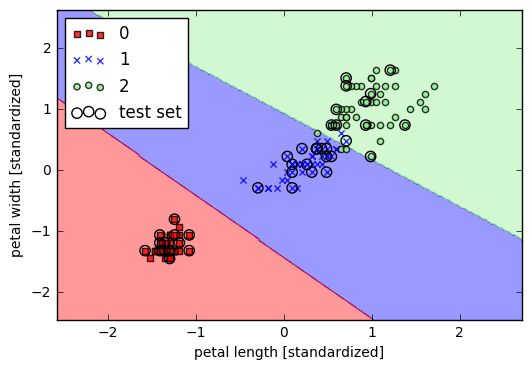

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# SVMのトレーニング
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

# トレーニングデータとテストデータを行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined,
                                        classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()